In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Load the dataset
df = pd.read_csv('sales_data.csv')

# Inspect the dataset
print(df.head())  # Display first few rows
print(df.info())  # Show data types and non-null counts
print(df.describe())  # Get summary statistics

# Check for missing values
print(df.isnull().sum())

# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")


         order_id order_date  ship_date       customer   manufactory  \
0  US-2020-103800   1/3/2019   1/7/2019  Darren Powers  Message Book   
1  US-2020-112326   1/4/2019   1/8/2019  Phillina Ober           GBC   
2  US-2020-112326   1/4/2019   1/8/2019  Phillina Ober         Avery   
3  US-2020-112326   1/4/2019   1/8/2019  Phillina Ober         SAFCO   
4  US-2020-141817   1/5/2019  1/12/2019     Mick Brown         Avery   

                                        product_name      segment  \
0  Message Book, Wirebound, Four 5 1/2" X 4" Form...     Consumer   
1         GBC Standard Plastic Binding Systems Combs  Home Office   
2                                          Avery 508  Home Office   
3                      SAFCO Boltless Steel Shelving  Home Office   
4  Avery Hi-Liter EverBold Pen Style Fluorescent ...     Consumer   

          category subcategory   region    zip          city         state  \
0  Office Supplies       Paper  Central  77095       Houston         Texas

In [ ]:
df = df.drop_duplicates()


In [39]:
# Fill missing values for numeric columns with mean or median
df['discount'] = df['discount'].fillna(df['discount'].mean())  # Using mean for discount
df['profit'] = df['profit'].fillna(df['profit'].mean())        # Using mean for profit
df['quantity'] = df['quantity'].fillna(df['quantity'].median())  # Using median for quantity
df['sales'] = df['sales'].fillna(df['sales'].mean())            # Using mean for sales

# Check if there are any remaining missing values
print(df.isnull().sum())  # This will print the number of missing values per column


order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
dtype: int64


In [31]:
df['ship_date'] = pd.to_datetime(df['ship_date'])

# Verify the conversion
print(df['ship_date'].head())


0   2019-01-07
1   2019-01-08
2   2019-01-08
3   2019-01-08
4   2019-01-12
Name: ship_date, dtype: datetime64[ns]


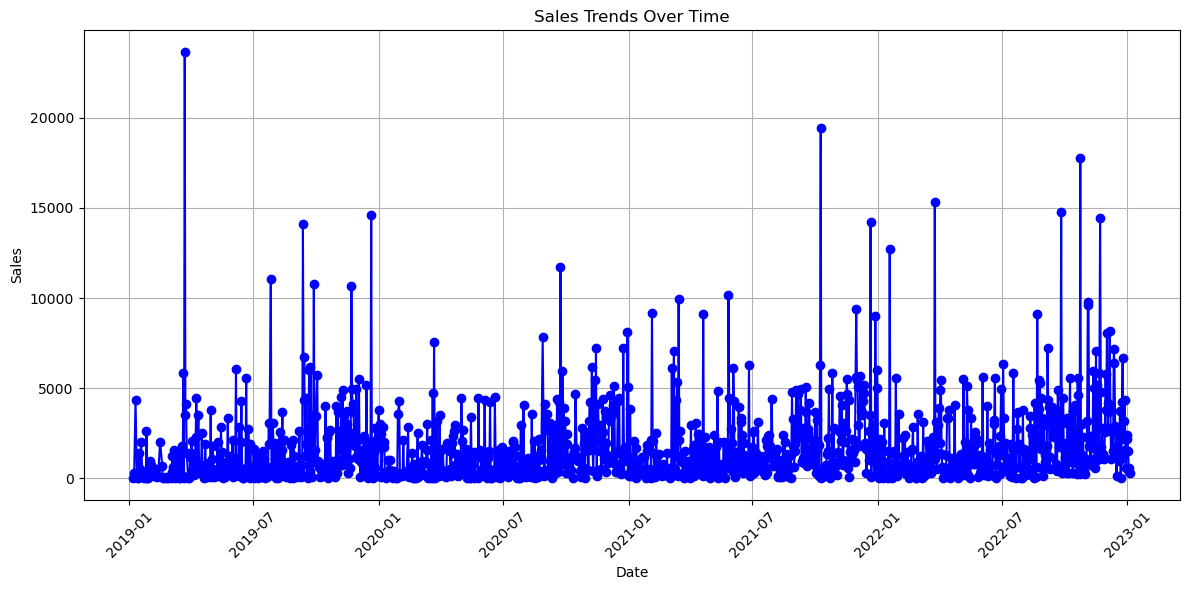

In [35]:
# Ensure the 'ship_date' column is in datetime format
df['ship_date'] = pd.to_datetime(df['ship_date'])

# Group by 'ship_date' and sum the 'sales' to observe trends
sales_over_time = df.groupby('ship_date')['sales'].sum()

# Plot the sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time, color='blue', marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


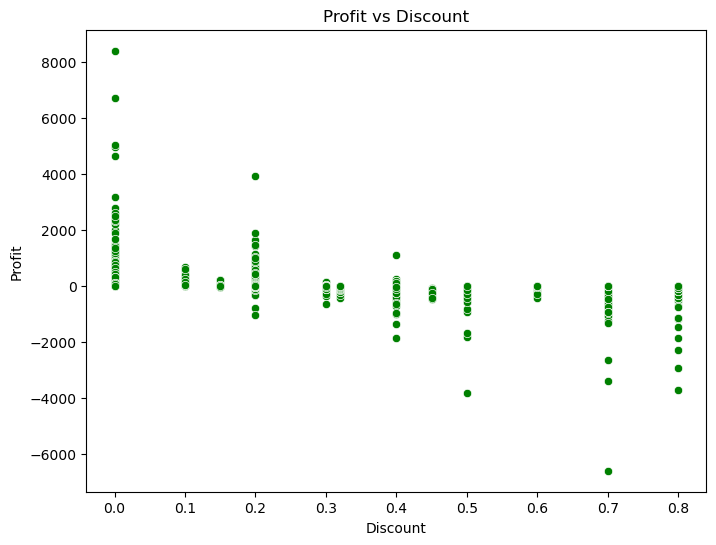

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='discount', y='profit', data=df, color='green')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


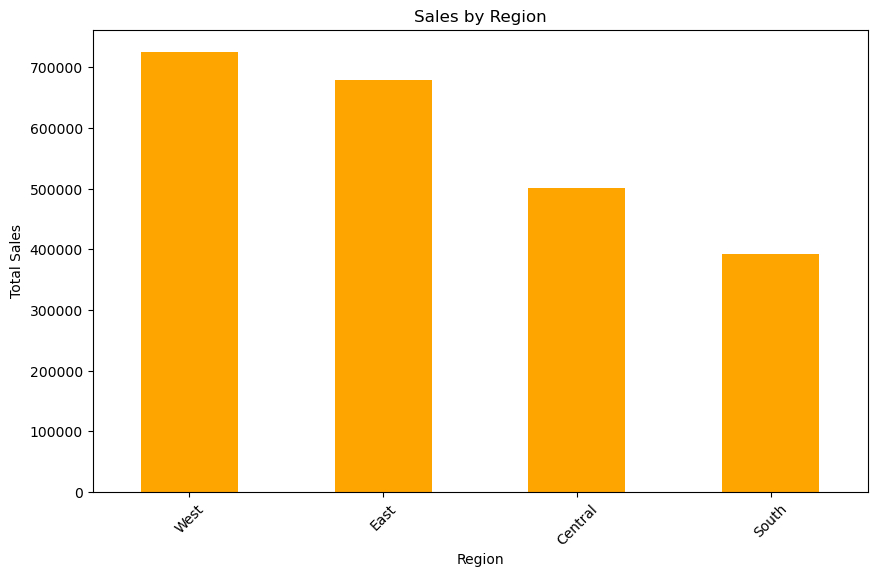

In [13]:
sales_by_region = df.groupby('region')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='orange')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


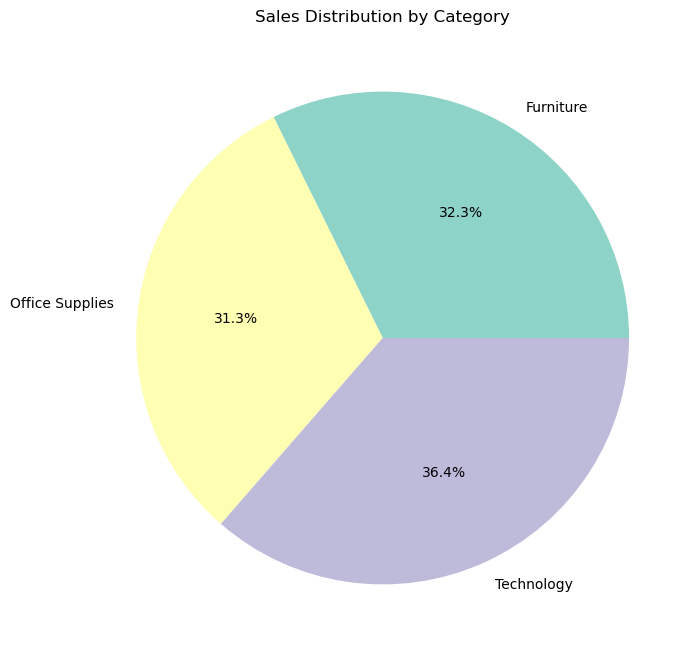

In [15]:
sales_by_category = df.groupby('category')['sales'].sum()

plt.figure(figsize=(8, 8))
sales_by_category.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3', len(sales_by_category)))
plt.title('Sales Distribution by Category')
plt.ylabel('')  # Hide the y-label
plt.show()


In [25]:
# Define features (Profit and Discount) and target (Sales)
X = df[['profit', 'discount']]
y = df['sales']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Import necessary libraries for training the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
# Features: 'Profit' and 'Discount', Target: 'Sales'
X = df[['Profit', 'Discount']]  # Features (independent variables)
y = df['Sales']  # Target variable (dependent variable)

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train (fit) the model using the training data
model.fit(X_train, y_train)

# After fitting the model, print model parameters (coefficients and intercept)
print("Model trained successfully!")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

# 1. Making Predictions with the Model
y_pred = model.predict(X_test)

# 2. Evaluate the model performance
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R² Score (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# If you want to inspect predictions vs actual values:
predictions_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print(predictions_df.head())

# You can also visualize the predictions vs actual values (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


KeyError: "None of [Index(['Profit', 'Discount'], dtype='object')] are in the [columns]"

In [29]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 159893.55032916347
R² Score: 0.38910046648252283


In [41]:
# 5. Insights and Recommendations

# 5.1 Analyze the coefficients to understand relationships
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)

# 5.2 Insights on improving sales
if model.coef_[0] > 0:  # Profit has a positive effect on Sales
    print("Recommendation: Increasing Profit is directly related to higher sales. Consider optimizing profit margins and focusing on high-profit products.")
else:
    print("Recommendation: Profit has a negative effect on sales. Examine pricing strategies, cost-cutting measures, or explore different pricing models to improve profit.")

if model.coef_[1] > 0:  # Discount has a positive effect on Sales
    print("Recommendation: Offering higher discounts can increase sales. However, monitor the effect on profitability. Find the optimal discount rate that maximizes sales without sacrificing profit.")
else:
    print("Recommendation: Increasing the discount does not significantly increase sales. Consider adjusting marketing strategies or improving product features instead.")

# 5.3 Top-Performing Regions and Categories
# Identify the top 3 performing regions based on total sales
top_regions = sales_by_region.head(3)
print(f"Top-Performing Regions: {', '.join(top_regions.index)}")

# Identify the top 3 best-selling categories
top_categories = sales_by_category.sort_values(ascending=False).head(3)
print(f"Best-Selling Categories: {', '.join(top_categories.index)}")


Model Coefficients:
          Coefficient
profit       1.241172
discount   229.408713
Recommendation: Increasing Profit is directly related to higher sales. Consider optimizing profit margins and focusing on high-profit products.
Recommendation: Offering higher discounts can increase sales. However, monitor the effect on profitability. Find the optimal discount rate that maximizes sales without sacrificing profit.
Top-Performing Regions: West, East, Central
Best-Selling Categories: Technology, Furniture, Office Supplies
